In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tools import show_roc_curve, print_classif_metrics, print_regress_metrics

# Metricas de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



c:\src\theBridge\course-env\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\src\theBridge\course-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


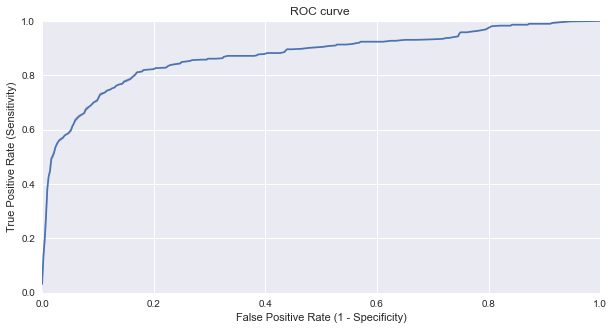

In [2]:
titanic_df = sns.load_dataset('titanic')

# Modelo rapido sin dividir en train/test ni ndada
titanic_df2 = titanic_df.drop(columns=['deck', 'alive']).copy()
titanic_df2 = titanic_df2.dropna()
titanic_df2 = pd.get_dummies(titanic_df2)

lr = LogisticRegression()
X = titanic_df2.iloc[:, 1:]
y = titanic_df2.iloc[:, 0]

lr.fit(X, y)
preds = lr.predict(X)

y_pred = lr.predict_proba(X)[:, 1]
show_roc_curve(y, y_pred)


In [3]:
y_pred = lr.predict(X)
print_classif_metrics(y, y_pred)

Accuracy score: 0.823 %
Recall score: 0.796 %
Precision score: 0.757 %
F1 score: 0.776 %
AUC: 0.818 %


In [3]:
diamonds_df = sns.load_dataset('diamonds')

diamonds_df2 = pd.get_dummies(diamonds_df)

lr = LinearRegression()
X = diamonds_df2.drop(columns = ['price'])
y = diamonds_df2['price']

lr.fit(X, y)
y_pred = lr.predict(X)

print_regress_metrics(y, y_pred)

R^2 score: 0.9128
MAE score: 740.476
MSE score: 1276866.7661
RMSE score: 1129.9853
MAPE score: 39.1852 %
